### Economic Growth Rate Analysis
### Does Inflation Fundamentally Affect Economic Growth?

**Model 1** 

Utilizes a basic linear regression model to analyze economic indicators (unemployment rate, inflation rate, real interest rate, and primary school enrollment rate) as predictors of GDP growth rate.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd # pandas 
import numpy as np # numpy 

In [3]:
# Read the Excel file using pd.read_excel
df = pd.read_excel("6303 econ project .xlsx")
df

,Time,Time Code,Country Name,Country Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]","Adjusted net enrollment rate, primary (% of primary school age children) [SE.PRM.TENR]",Real interest rate (%) [FR.INR.RINR]
0,1995,YR1995,Algeria,DZA,3.799995,31.840,28.577038,88.39232,-7.902166
1,1995,YR1995,Australia,AUS,3.887106,8.470,2.280091,94.99609,8.036666
2,1995,YR1995,Bahrain,BHR,3.929992,1.128,1.090668,99.11400,10.496703
3,1995,YR1995,Belarus,BLR,-10.400000,17.700,661.504077,88.16409,-63.887258
4,1995,YR1995,Botswana,BWA,7.030410,21.350,7.155295,83.12641,6.776494
...,...,...,...,...,...,...,...,...,...
1647,2018,YR2018,Suriname,SUR,4.948271,7.932,5.660594,86.02531,8.175726
1648,2018,YR2018,Tanzania,TZA,5.457583,2.203,3.049568,82.35094,13.939504
1649,2018,YR2018,Timor-Leste,TLS,-0.690257,4.718,-1.313919,95.41421,14.966874
1650,2018,YR2018,Uzbekistan,UZB,5.879743,5.856,26.922395,96.84487,-5.481123


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 9 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Time                                                                                    1652 non-null   int64  
 1   Time Code                                                                               1652 non-null   object 
 2   Country Name                                                                            1652 non-null   object 
 3   Country Code                                                                            1652 non-null   object 
 4   GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]                                               1652 non-null   float64
 5   Unemployment, total (% of total labor force) (modeled ILO estimate) [S

In [5]:
# Rename the column names in the DataFrame
df = df.rename(columns={
    "GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]": "GDP growth",
    "Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]": "Unemployment Rate",
    "Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]": "Inflation",
    "Adjusted net enrollment rate, primary (% of primary school age children) [SE.PRM.TENR]": "Adjusted net enrollment rate, primary",
    "Real interest rate (%) [FR.INR.RINR]": "Real Interest Rate"
})

df

,Time,Time Code,Country Name,Country Code,GDP growth,Unemployment Rate,Inflation,"Adjusted net enrollment rate, primary",Real Interest Rate
0,1995,YR1995,Algeria,DZA,3.799995,31.840,28.577038,88.39232,-7.902166
1,1995,YR1995,Australia,AUS,3.887106,8.470,2.280091,94.99609,8.036666
2,1995,YR1995,Bahrain,BHR,3.929992,1.128,1.090668,99.11400,10.496703
3,1995,YR1995,Belarus,BLR,-10.400000,17.700,661.504077,88.16409,-63.887258
4,1995,YR1995,Botswana,BWA,7.030410,21.350,7.155295,83.12641,6.776494
...,...,...,...,...,...,...,...,...,...
1647,2018,YR2018,Suriname,SUR,4.948271,7.932,5.660594,86.02531,8.175726
1648,2018,YR2018,Tanzania,TZA,5.457583,2.203,3.049568,82.35094,13.939504
1649,2018,YR2018,Timor-Leste,TLS,-0.690257,4.718,-1.313919,95.41421,14.966874
1650,2018,YR2018,Uzbekistan,UZB,5.879743,5.856,26.922395,96.84487,-5.481123


In [6]:
# Create a new DataFrame 'independent_df' containing the economic indicator columns for independent variables
independent_df1 = df.loc[:, ['Unemployment Rate','Inflation','Real Interest Rate','Adjusted net enrollment rate, primary']]

In [7]:
independent_df1

,Unemployment Rate,Inflation,Real Interest Rate,"Adjusted net enrollment rate, primary"
0,31.840,28.577038,-7.902166,88.39232
1,8.470,2.280091,8.036666,94.99609
2,1.128,1.090668,10.496703,99.11400
3,17.700,661.504077,-63.887258,88.16409
4,21.350,7.155295,6.776494,83.12641
...,...,...,...,...
1647,7.932,5.660594,8.175726,86.02531
1648,2.203,3.049568,13.939504,82.35094
1649,4.718,-1.313919,14.966874,95.41421
1650,5.856,26.922395,-5.481123,96.84487


In [8]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [9]:
# Prepare data for a linear regression of model1
# Add a constant to the independent variables
X = sm.add_constant(independent_df1)
Y = df['GDP growth']
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.75,random_state = 100)

In [10]:
# Fit the linear regression model
model1 = sm.OLS(train_y, train_X).fit()
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
=====================================================================================
Model:                     OLS                    Adj. R-squared:           0.031    
Dependent Variable:        GDP growth             AIC:                      7238.2177
Date:                      2023-10-05 09:25       BIC:                      7263.8280
No. Observations:          1239                   Log-Likelihood:           -3614.1  
Df Model:                  4                      F-statistic:              10.75    
Df Residuals:              1234                   Prob (F-statistic):       1.43e-08 
R-squared:                 0.034                  Scale:                    20.087   
-------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------------
const                                  7.7282   0.9635  8.0208 0.0000  5.8379  9.6185
Unemployment Rate                     -0.0718   0.0218 -3.2903 0.0010 -0.1147 -0.0290
Inflation                             -0.0189   0.0042 -4.5462 0.0000 -0.0271 -0.0107
Real Interest Rate                    -0.0184   0.0136 -1.3526 0.1764 -0.0451  0.0083
Adjusted net enrollment rate, primary -0.0293   0.0106 -2.7631 0.0058 -0.0501 -0.0085
-------------------------------------------------------------------------------------
Omnibus:                    457.256            Durbin-Watson:               2.025    
Prob(Omnibus):              0.000              Jarque-Bera (JB):            27465.293
Skew:                       0.870              Prob(JB):                    0.000    
Kurtosis:                   26.000             Condition No.:               693      
=====================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

In [11]:
# Make predictions on the test set
Y_Pred = model1.predict(test_X)

In [12]:
from sklearn.linear_model import LinearRegression
import seaborn as sn
import matplotlib.pyplot as plt

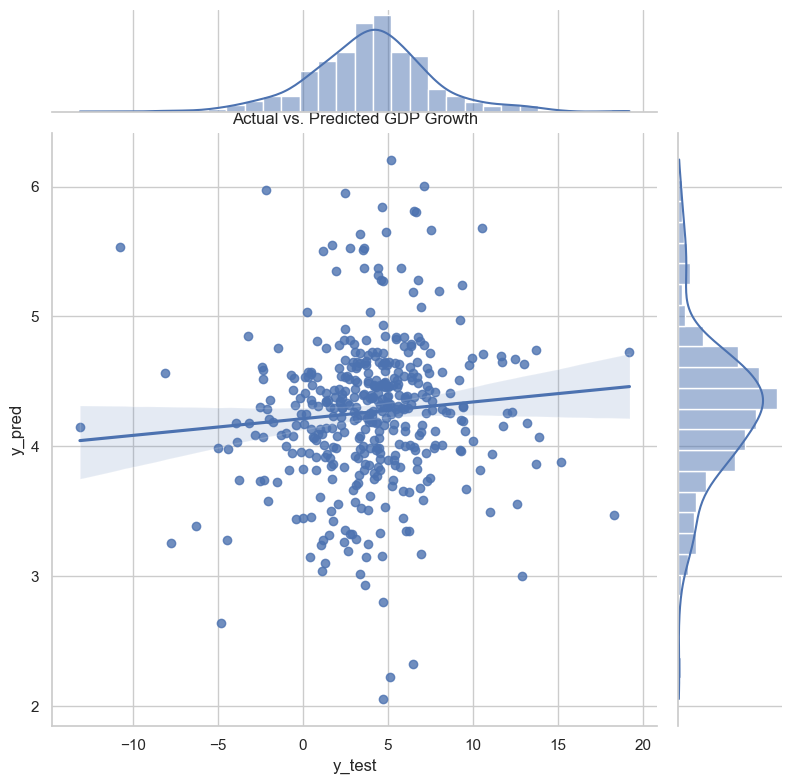

In [13]:
# Create a scatter plot for visualizing the relationship between actual and predicted GDP growth rates
sn.set(style="whitegrid")
sn.jointplot(x=test_y, y=Y_Pred, kind='reg', height=8)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title("Actual vs. Predicted GDP Growth")
plt.show()

**Note**

Based on the results of Model 1, the R-squared value (Adj. R-squared) is 0.031, which implies that the model can explain approximately 3.1% of the variance in GDP growth. We can observe that when considering only four economic indicators, the model's explanatory power is relatively low. This might suggest that there are other unconsidered factors that have significant impacts on economic growth.

**Model 2**

Based on Model 1, we consider the further "Time" feature and incorporate it into the model through encoding. We convert the categorical variable "Time" into dummy/indicator variables.

In [14]:
# Uses Pandas pd.get_dummies() function to perform one-hot encoding
# Converts categorical data in the 'Time' column into binary columns
Time_encoded_df = pd.get_dummies(df, columns=['Time'], drop_first=False)

In [15]:
Time_encoded_df

,Time Code,Country Name,Country Code,GDP growth,Unemployment Rate,Inflation,"Adjusted net enrollment rate, primary",Real Interest Rate,Time_1995,Time_1996,...,Time_2009,Time_2010,Time_2011,Time_2012,Time_2013,Time_2014,Time_2015,Time_2016,Time_2017,Time_2018
0,YR1995,Algeria,DZA,3.799995,31.840,28.577038,88.39232,-7.902166,1,0,...,0,0,0,0,0,0,0,0,0,0
1,YR1995,Australia,AUS,3.887106,8.470,2.280091,94.99609,8.036666,1,0,...,0,0,0,0,0,0,0,0,0,0
2,YR1995,Bahrain,BHR,3.929992,1.128,1.090668,99.11400,10.496703,1,0,...,0,0,0,0,0,0,0,0,0,0
3,YR1995,Belarus,BLR,-10.400000,17.700,661.504077,88.16409,-63.887258,1,0,...,0,0,0,0,0,0,0,0,0,0
4,YR1995,Botswana,BWA,7.030410,21.350,7.155295,83.12641,6.776494,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,YR2018,Suriname,SUR,4.948271,7.932,5.660594,86.02531,8.175726,0,0,...,0,0,0,0,0,0,0,0,0,1
1648,YR2018,Tanzania,TZA,5.457583,2.203,3.049568,82.35094,13.939504,0,0,...,0,0,0,0,0,0,0,0,0,1
1649,YR2018,Timor-Leste,TLS,-0.690257,4.718,-1.313919,95.41421,14.966874,0,0,...,0,0,0,0,0,0,0,0,0,1
1650,YR2018,Uzbekistan,UZB,5.879743,5.856,26.922395,96.84487,-5.481123,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
# Create a new DataFrame 'independent_df2' containing the economic indicator columns and time-encoded data for independent variables
independent_df2 = Time_encoded_df[['Unemployment Rate','Inflation','Adjusted net enrollment rate, primary','Real Interest Rate'] + list(Time_encoded_df.columns[8:])]

In [17]:
independent_df2

,Unemployment Rate,Inflation,"Adjusted net enrollment rate, primary",Real Interest Rate,Time_1995,Time_1996,Time_1997,Time_1998,Time_1999,Time_2000,...,Time_2009,Time_2010,Time_2011,Time_2012,Time_2013,Time_2014,Time_2015,Time_2016,Time_2017,Time_2018
0,31.840,28.577038,88.39232,-7.902166,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.470,2.280091,94.99609,8.036666,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.128,1.090668,99.11400,10.496703,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17.700,661.504077,88.16409,-63.887258,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21.350,7.155295,83.12641,6.776494,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,7.932,5.660594,86.02531,8.175726,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1648,2.203,3.049568,82.35094,13.939504,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1649,4.718,-1.313919,95.41421,14.966874,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1650,5.856,26.922395,96.84487,-5.481123,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
# Prepare data for a linear regression of model2
# Add a constant to the independent variables
X1 = sm.add_constant(independent_df2)
Y1 = Time_encoded_df['GDP growth']
train_X, test_X, train_y, test_y = train_test_split( X1 ,Y1,train_size = 0.75,random_state = 100)

In [19]:
# Fit the linear regression model
model2 = sm.OLS(train_y, train_X).fit()
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
=====================================================================================
Model:                     OLS                    Adj. R-squared:           0.144    
Dependent Variable:        GDP growth             AIC:                      7106.3485
Date:                      2023-10-05 09:26       BIC:                      7249.7662
No. Observations:          1239                   Log-Likelihood:           -3525.2  
Df Model:                  27                     F-statistic:              8.729    
Df Residuals:              1211                   Prob (F-statistic):       1.09e-31 
R-squared:                 0.163                  Scale:                    17.731   
-------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------------
const                                  6.9847   0.8886  7.8599 0.0000  5.2412  8.7281
Unemployment Rate                     -0.0819   0.0207 -3.9518 0.0001 -0.1225 -0.0412
Inflation                             -0.0189   0.0040 -4.6724 0.0000 -0.0269 -0.0110
Adjusted net enrollment rate, primary -0.0258   0.0104 -2.4877 0.0130 -0.0461 -0.0054
Real Interest Rate                     0.0085   0.0135  0.6260 0.5315 -0.0181  0.0350
Time_1995                              0.6295   0.8109  0.7762 0.4378 -0.9615  2.2204
Time_1996                              0.5382   0.7322  0.7350 0.4625 -0.8984  1.9748
Time_1997                              0.8036   0.8832  0.9099 0.3630 -0.9291  2.5364
Time_1998                             -1.4887   0.7763 -1.9177 0.0554 -3.0117  0.0344
Time_1999                             -0.6008   0.6130 -0.9802 0.3272 -1.8035  0.6018
Time_2000                              0.1373   0.6221  0.2207 0.8254 -1.0832  1.3578
Time_2001                             -0.3454   0.5940 -0.5815 0.5610 -1.5107  0.8200
Time_2002                             -0.1522   0.6382 -0.2384 0.8116 -1.4042  1.0999
Time_2003                              0.2282   0.6235  0.3660 0.7144 -0.9950  1.4514
Time_2004                              3.7285   0.5607  6.6493 0.0000  2.6284  4.8286
Time_2005                              1.7913   0.5250  3.4120 0.0007  0.7613  2.8214
Time_2006                              3.6878   0.5256  7.0161 0.0000  2.6566  4.7190
Time_2007                              2.0834   0.5079  4.1024 0.0000  1.0871  3.0798
Time_2008                              1.2701   0.5646  2.2495 0.0247  0.1624  2.3778
Time_2009                             -3.3956   0.5333 -6.3671 0.0000 -4.4419 -2.3493
Time_2010                              1.4094   0.5413  2.6036 0.0093  0.3474  2.4715
Time_2011                              0.8807   0.5406  1.6293 0.1035 -0.1798  1.9412
Time_2012                             -0.1799   0.5253 -0.3425 0.7320 -1.2105  0.8506
Time_2013                             -0.0969   0.5161 -0.1879 0.8510 -1.1095  0.9156
Time_2014                             -0.9742   0.5395 -1.8057 0.0712 -2.0327  0.0843
Time_2015                             -1.9217   0.5248 -3.6621 0.0003 -2.9513 -0.8922
Time_2016                             -0.7005   0.5179 -1.3525 0.1765 -1.7166  0.3157
Time_2017                             -0.1208   0.5375 -0.2247 0.8222 -1.1753  0.9337
Time_2018                             -0.2266   0.6698 -0.3383 0.7352 -1.5408  1.0876
-------------------------------------------------------------------------------------
Omnibus:                 445.067         Durbin-Watson:            2.067             
Prob(Omnibus):           0.000           Jarque-Bera (JB):         29532.801         
Skew:                    0.791           Prob(JB):                 0.000             
Kurtosis:                26.866          Condition No.:            463547958977708864
======================

In [20]:
# Make predictions on the test set
Y_Pred = model2.predict(test_X)

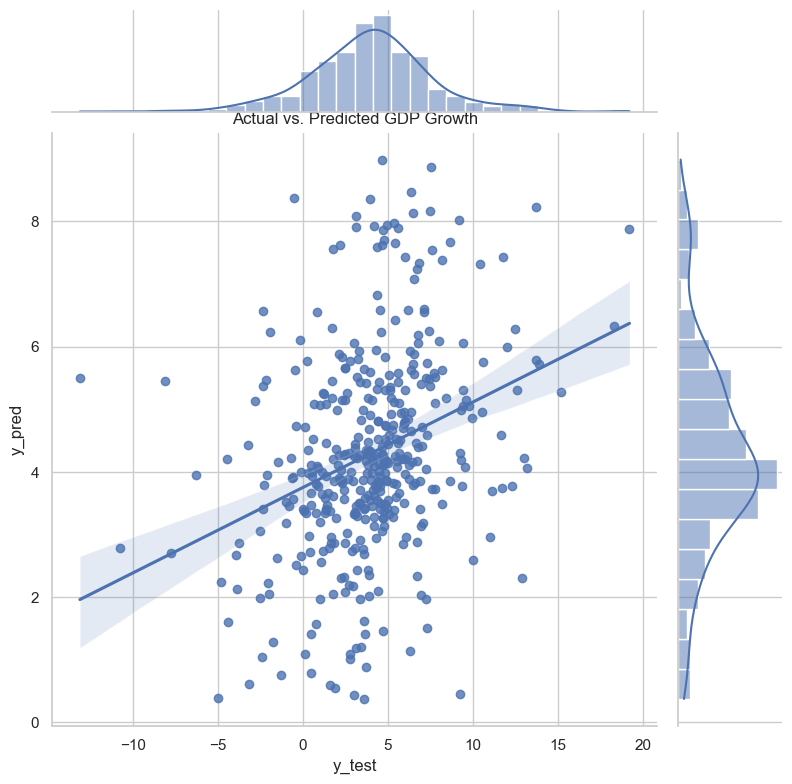

In [21]:
# Create a scatter plot for visualizing the relationship between actual and predicted GDP growth rates
sn.set(style="whitegrid")
sn.jointplot(x=test_y, y=Y_Pred, kind='reg', height=8)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title("Actual vs. Predicted GDP Growth")
plt.show()

**Note**

We can see that compared with Model 1, Model 2 is preferred because it considers global economic fluctuations and accounts for time-related variations.

**Model 3**

Expands on Model 2 by additionally considering the "Country Code" feature and incorporating it through encoding. We also convert the categorical variable " Country Code " into dummy/indicator variables.

In [22]:
# Uses Pandas pd.get_dummies() function to perform one-hot encoding
# Converts categorical data in the 'Country Code' column into binary columns
Country_encoded_df  = pd.get_dummies(Time_encoded_df, columns=['Country Code'])

In [23]:
Country_encoded_df

,Time Code,Country Name,GDP growth,Unemployment Rate,Inflation,"Adjusted net enrollment rate, primary",Real Interest Rate,Time_1995,Time_1996,Time_1997,...,Country Code_UZB,Country Code_VCT,Country Code_VEN,Country Code_VNM,Country Code_VUT,Country Code_WSM,Country Code_YEM,Country Code_ZAF,Country Code_ZMB,Country Code_ZWE
0,YR1995,Algeria,3.799995,31.840,28.577038,88.39232,-7.902166,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,YR1995,Australia,3.887106,8.470,2.280091,94.99609,8.036666,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,YR1995,Bahrain,3.929992,1.128,1.090668,99.11400,10.496703,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,YR1995,Belarus,-10.400000,17.700,661.504077,88.16409,-63.887258,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,YR1995,Botswana,7.030410,21.350,7.155295,83.12641,6.776494,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,YR2018,Suriname,4.948271,7.932,5.660594,86.02531,8.175726,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1648,YR2018,Tanzania,5.457583,2.203,3.049568,82.35094,13.939504,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1649,YR2018,Timor-Leste,-0.690257,4.718,-1.313919,95.41421,14.966874,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1650,YR2018,Uzbekistan,5.879743,5.856,26.922395,96.84487,-5.481123,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [24]:
independent_df3 = Country_encoded_df[['Unemployment Rate','Inflation','Adjusted net enrollment rate, primary','Real Interest Rate'] + list(Country_encoded_df.columns[8:])]

In [25]:
independent_df3

,Unemployment Rate,Inflation,"Adjusted net enrollment rate, primary",Real Interest Rate,Time_1996,Time_1997,Time_1998,Time_1999,Time_2000,Time_2001,...,Country Code_UZB,Country Code_VCT,Country Code_VEN,Country Code_VNM,Country Code_VUT,Country Code_WSM,Country Code_YEM,Country Code_ZAF,Country Code_ZMB,Country Code_ZWE
0,31.840,28.577038,88.39232,-7.902166,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.470,2.280091,94.99609,8.036666,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.128,1.090668,99.11400,10.496703,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17.700,661.504077,88.16409,-63.887258,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21.350,7.155295,83.12641,6.776494,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,7.932,5.660594,86.02531,8.175726,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1648,2.203,3.049568,82.35094,13.939504,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1649,4.718,-1.313919,95.41421,14.966874,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1650,5.856,26.922395,96.84487,-5.481123,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [26]:
# Prepare data for a linear regression of model3
# Add a constant to the independent variables
X2 = sm.add_constant(independent_df3)
Y2 = df['GDP growth']
train_X, test_X, train_y, test_y = train_test_split( X2 ,Y2,train_size = 0.75,random_state = 100)

In [27]:
# Fit the linear regression model
model3 = sm.OLS(train_y, train_X).fit()
model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
======================================================================================
Model:                      OLS                    Adj. R-squared:           0.258    
Dependent Variable:         GDP growth             AIC:                      7046.4989
Date:                       2023-10-05 09:26       BIC:                      7845.5403
No. Observations:           1239                   Log-Likelihood:           -3367.2  
Df Model:                   155                    F-statistic:              3.783    
Df Residuals:               1083                   Prob (F-statistic):       5.99e-38 
R-squared:                  0.351                  Scale:                    15.365   
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    t    P>|t|   [0.025   0.975]
--------------------------------------------------------------------------------------
const                                  6.0663   2.0264  2.9937 0.0028   2.0902 10.0424
Unemployment Rate                     -0.1049   0.0646 -1.6244 0.1046  -0.2316  0.0218
Inflation                             -0.0223   0.0042 -5.2852 0.0000  -0.0306 -0.0141
Adjusted net enrollment rate, primary  0.0046   0.0226  0.2051 0.8375  -0.0397  0.0489
Real Interest Rate                    -0.0133   0.0168 -0.7901 0.4296  -0.0463  0.0197
Time_1996                              0.0130   1.0689  0.0121 0.9903  -2.0844  2.1104
Time_1997                             -0.2411   1.1873 -0.2030 0.8391  -2.5708  2.0886
Time_1998                             -2.8059   1.1086 -2.5311 0.0115  -4.9811 -0.6307
Time_1999                             -1.8030   1.0122 -1.7812 0.0752  -3.7892  0.1832
Time_2000                             -0.8661   1.0167 -0.8519 0.3945  -2.8611  1.1289
Time_2001                             -1.6769   1.0052 -1.6683 0.0955  -3.6492  0.2954
Time_2002                             -1.3314   1.0353 -1.2860 0.1987  -3.3628  0.7001
Time_2003                             -0.9956   1.0397 -0.9575 0.3385  -3.0357  1.0445
Time_2004                              2.2965   1.0017  2.2927 0.0221   0.3311  4.2619
Time_2005                              0.2778   0.9901  0.2806 0.7790  -1.6648  2.2205
Time_2006                              1.7227   0.9924  1.7359 0.0829  -0.2246  3.6699
Time_2007                              0.6971   0.9904  0.7039 0.4817  -1.2463  2.6405
Time_2008                             -0.4819   1.0354 -0.4654 0.6417  -2.5135  1.5497
Time_2009                             -5.0020   1.0008 -4.9982 0.0000  -6.9657 -3.0384
Time_2010                             -0.2954   1.0165 -0.2906 0.7714  -2.2899  1.6991
Time_2011                             -0.6488   1.0118 -0.6412 0.5215  -2.6342  1.3366
Time_2012                             -1.4998   0.9963 -1.5053 0.1325  -3.4548  0.4552
Time_2013                             -1.4800   0.9937 -1.4895 0.1366  -3.4297  0.4697
Time_2014                             -2.4534   1.0163 -2.4140 0.0159  -4.4476 -0.4592
Time_2015                             -3.3855   1.0039 -3.3724 0.0008  -5.3553 -1.4157
Time_2016                             -2.4032   1.0060 -2.3888 0.0171  -4.3772 -0.4292
Time_2017                             -2.2089   1.0217 -2.1619 0.0308  -4.2137 -0.2041
Time_2018                             -2.4623   1.1019 -2.2347 0.0256  -4.6243 -0.3003
Country Code_AGO                       1.2013   1.9764  0.6078 0.5434  -2.6767  5.0794
Country Code_ALB                       1.3439   1.2879  1.0434 0.2970  -1.1832  3.8710
Country Code_ARG                       1.1351   1.9803  0.5732 0.5666  -2.7506  5.0207
Country Code_ARM                       4.0462   1.3473  3.0033 0.0027   1.4027  6.6897
Country Code_AUS                      -1.8665   0.9871 -1.8908 0.0589  -3.8034  0.0704
Country Code_AZE                       5.7513   0.9907  5.8053 0

In [28]:
# Make predictions on the test set
Y_Pred = model3.predict(test_X)

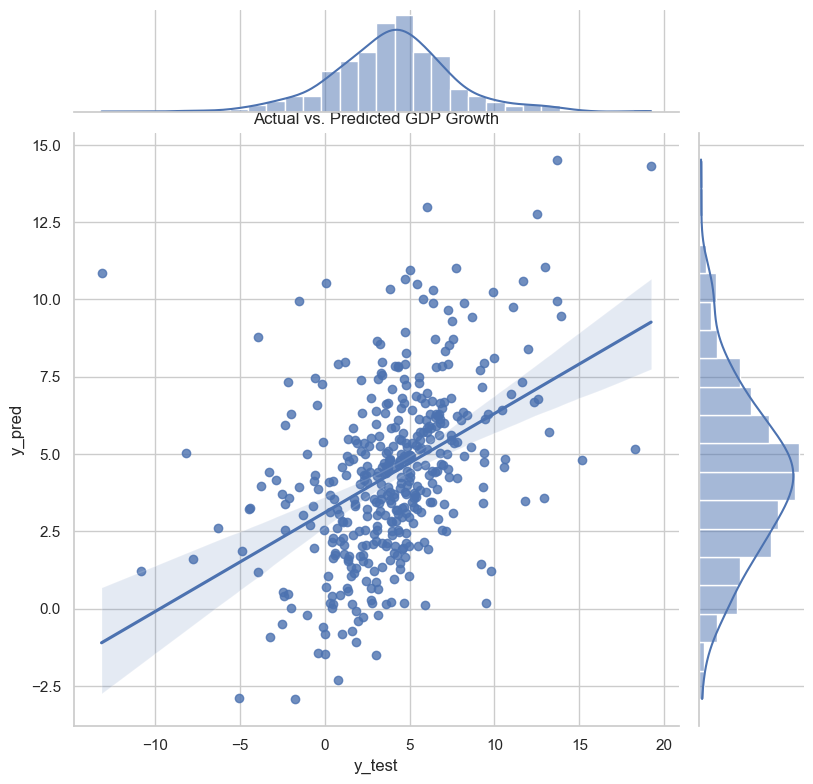

In [29]:
# Create a scatter plot for visualizing the relationship between actual and predicted GDP growth rates
sn.set(style="whitegrid")
sn.jointplot(x=test_y, y=Y_Pred, kind='reg', height=8)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title("Actual vs. Predicted GDP Growth")
plt.show()

**Note**

Finally, We selected model 3 for its comprehensive consideration of economic indicators, time-related factors, and country-specific characteristics, especially its ability to account for variations in inflation based on specific country characteristics.